In [1]:
from argotools.dataFormatter import Load
from argotools.visualize import InputVis
from argotools.visualize import OutputVis
from argotools.experiment import ARGO_lrmse
from argotools.forecastlib.argo_methods_ import *
from argotools.forecastlib.functions import *
from sklearn.linear_model import LassoCV


In [2]:
path_to_ili = '/Users/leonardo/Desktop/UNIVERSIDAD/SEMESTRE4/dataAnalytics/final_project/TARGET_DATA/ALL_DENGUE.csv'
path_to_GC = '/Users/leonardo/Desktop/UNIVERSIDAD/SEMESTRE4/dataAnalytics/final_project/FEATURES/filtered_words_nodups.csv' 
country_codes = [ 'Singapore']
study_period = ['2012-01-01', '2017-03-13'] 

## Initializing object

Load is the main class from dataFormatter. It contains several functions that automate the loading, formatting and basic preprocessing of data prior to any more serious procedures. To generate an object, you just call its constructor:

In [3]:
data_object = Load(start_period=study_period[0], end_period=study_period[1], ids=country_codes)

Load object initialized with the following ids : ['Singapore']


## Adding features and target data

In its inner structure, the Load object keeps target and feature data in separate dictionaries. There are several functions to add data into the load object, depending on which is your case. The most commonly used are "add_target" and "add_features_customSource". After learning how to use these two, it is fairly easy to understand the other functions available.

We'll add target data from a formatted source (influenza cases from Flunet) and features data from a custom source (Google Correlate data).

NOTE: In this example we use GC data directly from Google Correlate. This data has not been properly filtered, and many words that are correlated with the term influenza may not be useful to fit a model. For real model-fitting, please make sure to properly preprocess your data.  
    

In [4]:
for country in country_codes:
    data_object.add_target(id_=country, path_to_file=path_to_ili)
    data_object.add_features_customSource(id_=country, path_to_file=path_to_GC, source='standard', overwrite=False, verbose=False, autoanswer=None)
    




WARNING! features and target indices for Singapore are not equal. Indices from                       features not within the target are the following:
2012-01-01
2012-01-08
2012-01-15
2012-01-22
2012-01-29
2012-02-05
2012-02-12
2012-02-19
2012-02-26
2012-03-04
2012-03-11
2012-03-18
2012-03-25
2012-04-01
2012-04-08
2012-04-15
2012-04-22
2012-04-29
2012-05-06
2012-05-13
2012-05-20
2012-05-27
2012-06-03
2012-06-10
2012-06-17
2012-06-24
2012-07-01
2012-07-08
2012-07-15
2012-07-22
2012-07-29
2012-08-05
2012-08-12
2012-08-19
2012-08-26
2012-09-02
2012-09-09
2012-09-16
2012-09-23
2012-09-30
2012-10-07
2012-10-14
2012-10-21
2012-10-28
2012-11-04
2012-11-11
2012-11-18
2012-11-25
2012-12-02
2012-12-09
2012-12-16
2012-12-23
2012-12-30
2013-01-06
2013-01-13
2013-01-20
2013-01-27
2013-02-03
2013-02-10
2013-02-17
2013-02-24
2013-03-03
2013-03-10
2013-03-17
2013-03-24
2013-03-31
2013-04-07
2013-04-14
2013-04-21
2013-04-28
2013-05-05
2013-05-12
2013-05-19
2013-05-26
2013-06-02
2013-06-09
2013-06-16
20

## Different indices
Note that the target and feature data have different indices (Load pops-up a message if this happens). This is a problem that's frequent when using different data sources. It is greatly recommended to set all the indices alike to avoid any confusion from pandas in the following phases of data. In this case, changing the indices is fairly easy because our data sources do not have missing rows (they're both 365 rows) and the dates correspond only to 1 day difference. For other problems, it might not be the case, and it is a good idea to fix this differences prior to using Load.

In this example, we'll use the target's index as our standard and overwrite the features indices using pandas function "set_index".

In [5]:
# Fixing indices
for country in country_codes:
    data_object.features[country].set_index(data_object.target[country].index, inplace=True)


In [6]:
study_period[0] = '2012-01-02' # We changed the dates to the exact ones because datavis does not accept approximate dates.
study_period[1] = '2017-03-13'

## Fitting a linear regression using  argotools

After you've looked at your data and performed the neccessary pre-processing steps, it is time to fit a model. We use the experiment library to do this.

In [7]:
mod = LassoCV(cv=10, fit_intercept=True, n_alphas=1000, max_iter=20000, tol=.001, normalize=True,\
             positive=False)

model_dict = {
    'ARGO_filtered': [lasso_family, preproc_rmv_values, 5, None, False, mod],
    'ARGO': [lasso_family, preproc_rmv_values, None, None, False, mod],
    'AR': [lasso_family, preproc_rmv_values, None, None, False, mod]
}

argo_tester = ARGO_lrmse(data=data_object, model_dict=model_dict, output_name='NORM_TEST', training_window= 'static', \
            training_window_size=104, horizon=1, feature_preprocessing='zscore',\
            ar_model=52, load_folder = None, ar_column_filtering=True, out_of_sample_rmse=False)
argo_tester.run(period_start='2015-01-05', period_end='2016-12-26', verbose=False, cont=False) #'2016-12-26'

Succesfully initialized experiment object.
Entering main computation loop. 

Preparing data and performing a forecasting loop for Singapore
Starting predictor ARGO_filtered with model=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=20000, n_alphas=1000, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.001, verbose=False) and model_preproc=<function preproc_rmv_values at 0x11cbc8f28>
Starting predictor ARGO with model=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=20000, n_alphas=1000, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.001, verbose=False) and model_preproc=<function preproc_rmv_values at 0x11cbc8f28>
Starting predictor AR with model=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=20000, n_alphas=1000, n_jobs=None, normalize=True

the experiment library fits a multivariate linear model using the ARGO methodology. In timeseries prediction, data becomes available with time (every week, in this case), therefore, it is useful to update and recalibrate your prediction model everytime a new prediction week is coming. This library helps with the recalibration process for every model, in every location. After finishing with the fitting / prediction process, it writes out the model predictions into a csv file in the folder structure it created. the library also has the advantage that it keeps track of the model coefficients in this recalibration process, giving you the possibility of analyzing how the features impact change within time.
## Visualizing the output

Lets take a look at the data that we have created through the ARGO_lrmse class. 

In [8]:
results_df = pd.read_csv('/Users/leonardo/Desktop/flu-code/argotools-pkg/NORM_TEST/Singapore/preds.csv', index_col=0)
print(results_df)

              ILI  ARGO_filtered        ARGO          AR
2015-01-05  256.0     205.209153  220.056152  194.315165
2015-01-12  228.0     275.947966  280.430990  278.443442
2015-01-19  237.0     254.825742  263.112135  253.138323
2015-01-26  259.0     260.394349  267.135889  261.369341
2015-02-02  212.0     281.420916  280.560539  281.266651
2015-02-09  173.0     244.178057  244.290742  240.749841
2015-02-16   99.0     216.663609  218.638627  210.717680
2015-02-23  172.0     163.741243  176.410558  145.272646
2015-03-02  189.0     216.607398  212.765813  205.959869
2015-03-09  110.0     236.807248  230.871092  218.628963
2015-03-16   91.0     180.728368  180.903162  147.732407
2015-03-23  129.0     140.585554  131.256812  132.932168
2015-03-30   90.0     165.453825  176.081429  164.884661
2015-04-06  107.0     130.411746  153.213496  127.672036
2015-04-13  137.0     135.859680  166.353026  146.077090
2015-04-20  113.0     168.825196  180.591118  168.540353
2015-04-27  120.0     155.81740

The csv file contains the predictions for each model and for each week. There are several things we can do with this results. We'll Output vis to benchmark and visualize them.

## Computing metrics from the results

We'll start fist with generating the metrics. We initialize the class object by inputting the results folder name (since we didn't we give it any particular name, the experiment object output a generic name like "ARGO_experiment") and the location identifiers.

To perform the metric computation, we use the "group_compute_metrics" function, which loads every location results and computes the metrics specified in the "which_metrics" variable. There are several metrics already available within the class, and it is fairly use to generate your own metric to work with this function.

To compute your metrics you only need the following:

1.- The intervals where to compute the metrics. the intervals are input for each ID in terms of a dictionary. Each key in the dictionary is an ID and it contains a list of tuples indicating the intervals: [('YYYY-MM-DD', 'YYYY-MM-DD')...]

2.- The name of the intervals, in the same format of a dict.

3.- The metrics you want to use (they should be available within the class)

In [9]:
results_visualizer = OutputVis('NORM_TEST', ids=country_codes)


# To compute metrics, we need to set the intervals where to compute the metrics, here we do it yearly and as whole period
start_interval = [ '2015-01-04', '2016-01-03', '2015-01-04'] #'2013-01-05'
end_interval = [ '2015-12-28', '2016-12-25', '2016-12-25']
period_labels = [ 'Y2015', 'Y2016', 'ALL_YEARS']

i = list(zip(start_interval, end_interval))
intervals = dict( zip(country_codes,[i]*len(country_codes)) )
interval_labels = dict( zip(country_codes, [period_labels]*len(country_codes)))

results_visualizer.group_compute_metrics(intervals, interval_labels, which_metrics=['PEARSON', 'RMSE', 'NRMSE'], write_to_overview=True)

metrics_example = pd.read_csv('/Users/leonardo/Desktop/flu-code/argotools-pkg/NORM_TEST/Singapore/metrics.csv')
print('This are the metrics for Argentina: \n',metrics_example)

Visualizer initialized
Finished iterating over all ids. Writing out condensed file in _overview folder
This are the metrics for Argentina: 
     METRIC          MODEL      Y2015      Y2016  ALL_YEARS
0  PEARSON  ARGO_filtered   0.789526   0.961711   0.932611
1  PEARSON           ARGO   0.759385   0.945768   0.913709
2  PEARSON             AR   0.766399   0.945361   0.916590
3     RMSE  ARGO_filtered  48.028842  45.712311  46.896127
4     RMSE           ARGO  50.362281  56.397188  53.435695
5     RMSE             AR  49.024733  52.836633  50.947838
6    NRMSE  ARGO_filtered   0.028990   0.021302   0.017298
7    NRMSE           ARGO   0.030398   0.026281   0.019710
8    NRMSE             AR   0.029591   0.024622   0.018793


/Users/leonardo/Desktop/flu-code/argotools-pkg/argotools/visualize/__init__.py:1510: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  ind = pd.MultiIndex(levels=levels, labels=labels, names=names)


After performing the metrics, we'll do a series of visualizations for the models. First we setup a set of style dictionaries, we'll give each model a color and a transparency to keep all the plots with the same style. After that, we call out a series of functions that will do the work for us.

In [10]:
color_dict = {
    'AR':'blue',
    'ARGO':'r',
    'ARGO_filtered':'blueviolet',
    'ILI':'black'
}
alpha_dict = {
    'AR': .8,
    'ARGO':.8,
    'ARGO_filtered':.8,
    'ILI':.8
}


results_visualizer.plot_SEC(series_filepath='/Users/leonardo/Desktop/flu-code/argotools-pkg/NORM_TEST/Singapore/preds.csv',\
         coeff_filepath='/Users/leonardo/Desktop/flu-code/argotools-pkg/NORM_TEST/Singapore/ARGO_coefficients.csv', \
         target_name='ILI', models=['ARGO', 'AR'],\
         color_dict=color_dict, start_period=None, end_period=None, alpha_dict=alpha_dict,\
         output_filename='/Users/leonardo/Desktop/flu-code/argotools-pkg/NORM_TEST/Singapore/SEC_plot', ext='png', mode='save', n_coeff=20, \
         font_path='/System/Library/Fonts/PingFang.ttc', vmin=-50, vmax=50)

#results_visualizer.plot_coefficients(coefficients_filepath='/Users/leonardo/Desktop/flu-code/argotools-pkg/ARGO_SINGAPORE/Singapore/ARGO_coefficients.csv',\
#                                     mode='save', output_filename='/Users/leonardo/Desktop/flu-code/argotools-pkg/ARGO_SINGAPORE/Singapore/coeff_plot')

In [11]:


mods = ['AR', 'ARGO', 'ARGO_filtered']
results_visualizer.group_barplot_metric(ids=country_codes, metric='NRMSE', period='ALL_YEARS',\
                             models=mods, color_dict=color_dict,\
                             alpha_dict=alpha_dict, metric_filename='metrics.csv',\
                             bar_separation_multiplier=1.5, mode='save', output_filename='NRMSE_ALLYEARS', ext='png')

results_visualizer.season_analysis(country_codes, [ 'Y2015', 'Y2016'], mods, folder_main=None, metrics=['PEARSON', 'NRMSE'], filename='metrics_condensed.csv', output_filename='season_analysis',\
 color_dict=None, alpha_dict=None, mode='save', ext='png')

for country_code in country_codes:
    results_visualizer.plot_series(id_=country_code,series_names=['AR','ARGO','ILI'], color_dict=color_dict, alpha_dict=alpha_dict,\
                        add_weekly_winner=True, winner_models=['AR', 'ARGO'], mode='save')




"group_barplot_metric" produces a horizontal barplot that lets you compare the performance of the models you fit based on a given metric (In this example, we use the 'NRMSE' metric, which is an RMSE scaled by the target's euclidean norm).

'season_analysis' provides two visualizations: the first provides a violin plot and box plot of the metrics. The distribution show by the violin plot gives us an idea of where is the most data concentrated in the range spanned by the box plot. The second visualization is a heatmap that contains the numer of times each model gets ranked in the first, second, ... nth place for each interval of time you ask the function look at (For example, if you look at the yearly performance (2013, 2014, 2015, 2016) for these three models (ARGO), you'll have 4 first places, 4 second places and 4 third places). The models which have the "best" performance would more often have the first and second places, thus having a stronger shade of red on the upper squares.


'plot_series' is a function that works individually for each location of study (Here we are just showing 1). the function just makes a quick plot of the model and the predictions based on the color scheme and transparency scheme we provided through our dictionaries. The model also gives some extra information below the timeseries plot. The rectangular heatmap tells you which model (identified by the colorbar) had the least regular error. For example, we can see that, in Mexico's 2015 flu unusual outbreak, the autoreggressive model dominated by having less error for almost the whole outbreak.

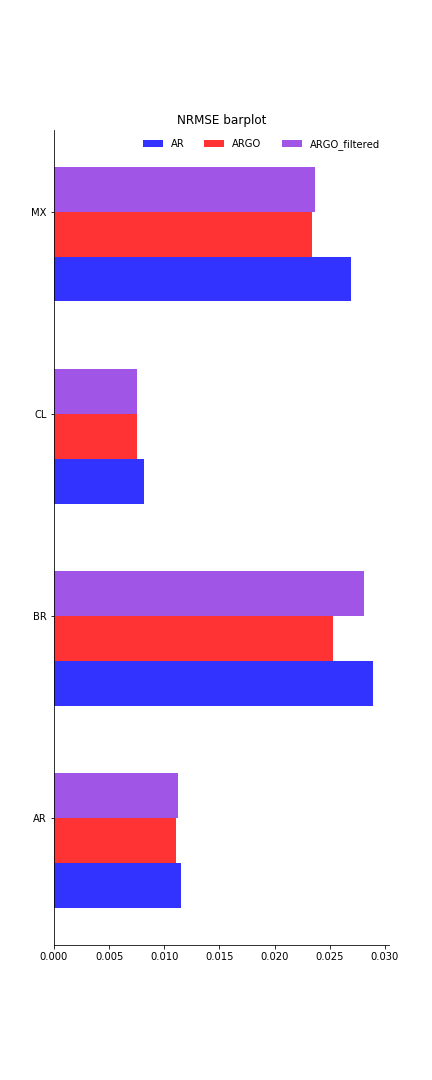

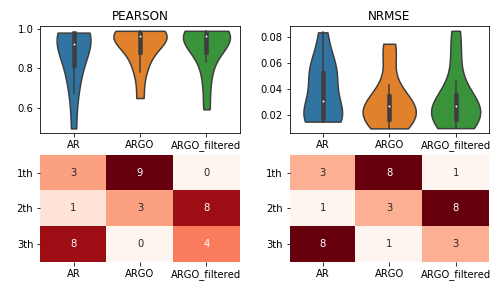

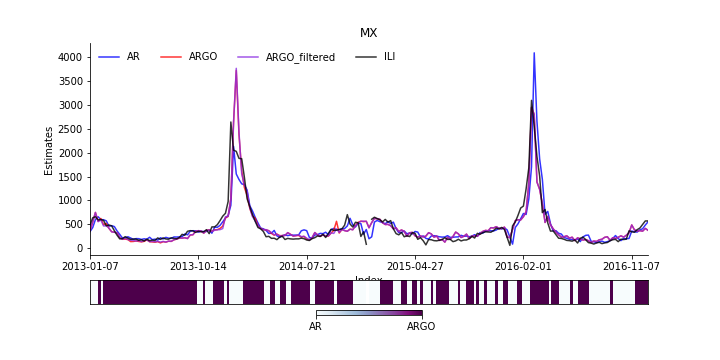

We have performed basic EDA, pre-processing, prototyping and benchmarking by only writing some lines of code. Moreover, our data has an organized structure and is easily compatible with other libraries through the CSV files. Hopefully you'll find some value in this library. 